In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import re

# Function to extract number from filename
def extract_number(filename):
    match = re.search(r'\d+', filename)
    if match:
        return int(match.group())
    return None


In [ ]:
import os
import pandas as pd
import glob

# Define the folder path
folder_path = '/content/drive/My Drive/results1/'

# Patterns for two types of files
pattern_llama = os.path.join(folder_path, 'llama_results_*.csv')
pattern_neural = os.path.join(folder_path, 'neural_results_*.csv')

# Find files for each type
llama_files = sorted(glob.glob(pattern_llama), key=extract_number)
neural_files = sorted(glob.glob(pattern_neural), key=extract_number)

#Comment Sabine: 1) Please make path not fixed but write the script that we 1) clone the data to the local mydrive or connect to our shared drive 2) have a standardized path; also I want you to think of this script to be executable through command line after cloning so make sure that works


In [ ]:
# reading process to ignore the first column
llama_dfs = [pd.read_csv(file, index_col=0) for file in llama_files]
neural_dfs = [pd.read_csv(file, index_col=0) for file in neural_files]

# Concatenate the DataFrames
llama_combined_df = pd.concat(llama_dfs, ignore_index=True)
neural_combined_df = pd.concat(neural_dfs, ignore_index=True)


In [ ]:
# Display the first few rows of each DataFrame
print("Llama Results:")
print(llama_combined_df.head())

print("\nNeural Results:")
print(neural_combined_df.head())

# Get basic information about each DataFrame
print("Llama DataFrame Info:")
llama_combined_df.info()

print("\nNeural DataFrame Info:")
neural_combined_df.info()


Llama Results:
                                             Context  \
0  [{'role': 'system', 'content': 'You are a chat...   
1  [{'role': 'system', 'content': 'You are a chat...   
2  [{'role': 'system', 'content': 'You are a chat...   
3  [{'role': 'system', 'content': 'You are a chat...   
4  [{'role': 'system', 'content': 'You are a chat...   

                                   Baseline Response              bot  \
0  The letter asks for the entire security deposi...  Non-Empathy Bot   
1  The way I understand our situation, it's been ...      Empathy Bot   
2  If that's true, your landlord may not be able ...      Empathy Bot   
3  Thank you for sharing. Let me check, when did ...      Empathy Bot   
4  Does the tenant still have a copy of the lease...  Non-Empathy Bot   

                                            response  text similarity  \
0  Sure, I've got that all set up. The letter wil...        16.972809   
1  Thank you for confirming. Let's begin writing ...         4.

In [ ]:
print("Llama Descriptive Statistics:")
print(llama_combined_df.describe())

print("\nNeural Descriptive Statistics:")
print(neural_combined_df.describe())


Llama Descriptive Statistics:
       text similarity   BLEU score  ROUGE score  LEVEN distance  \
count      2000.000000  2000.000000  2000.000000     2000.000000   
mean          8.922469     1.573987     0.105077       25.088345   
std           4.482739     1.953458     0.070245       12.085714   
min           0.925926     0.000000     0.000000        2.777778   
25%           5.620033     0.508565     0.057776       16.035347   
50%           8.245583     0.970208     0.092002       23.500941   
75%          12.265712     1.808365     0.131063       34.795815   
max          27.588762    24.929777     0.588235       68.235294   

       semantic similarity  factual consistency  LLM response length  \
count          2000.000000           2000.00000          2000.000000   
mean              0.383691             -0.16200             7.450500   
std               0.205498              0.41333             4.398889   
min              -0.108950             -1.00000             1.000000 

In [ ]:
# Checking for missing values
print("Missing values in Llama DataFrame:")
print(llama_combined_df.isnull().sum())

print("\nMissing values in Neural DataFrame:")
print(neural_combined_df.isnull().sum())

# Convert data types if necessary, for example:
# llama_combined_df['column_name'] = llama_combined_df['column_name'].astype('desired_type')


Missing values in Llama DataFrame:
Context                          0
Baseline Response                2
bot                              0
response                         0
text similarity                  0
BLEU score                       0
ROUGE score                      0
LEVEN distance                   0
semantic similarity              0
factual consistency              0
LLM response length              0
LLM sentiment                    0
LLM person form                  0
LLM pronoun                      0
LLM tense                        0
LLM exclamation                  0
LLM stimulating dialogue         0
LLM acknowledging                0
LLM collective reasoning         0
LLM imperative statement         0
LLM interim questions            0
LLM caring statement             0
baseline response length         0
baseline sentiment               0
baseline person form             0
baseline pronoun                 0
baseline tense                   0
baseline exclamation

In [ ]:
llama_combined_df['Source'] = 'Llama'
neural_combined_df['Source'] = 'Neural'
combined_data = pd.concat([llama_combined_df, neural_combined_df], ignore_index=True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Example: Plotting distribution of a column from Llama DataFrame
# plt.figure(figsize=(10, 6))
# sns.histplot(llama_combined_df['text similarity'], kde=True)
# plt.title('Distribution of Text Sim in Llama Results')
# plt.show()

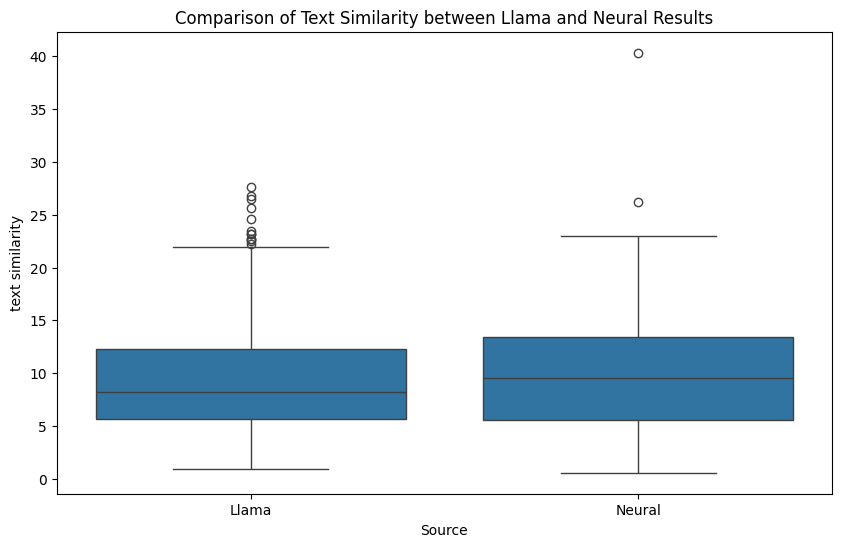

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='text similarity', data=combined_data)
plt.title('Comparison of Text Similarity between Llama and Neural Results')
plt.show()

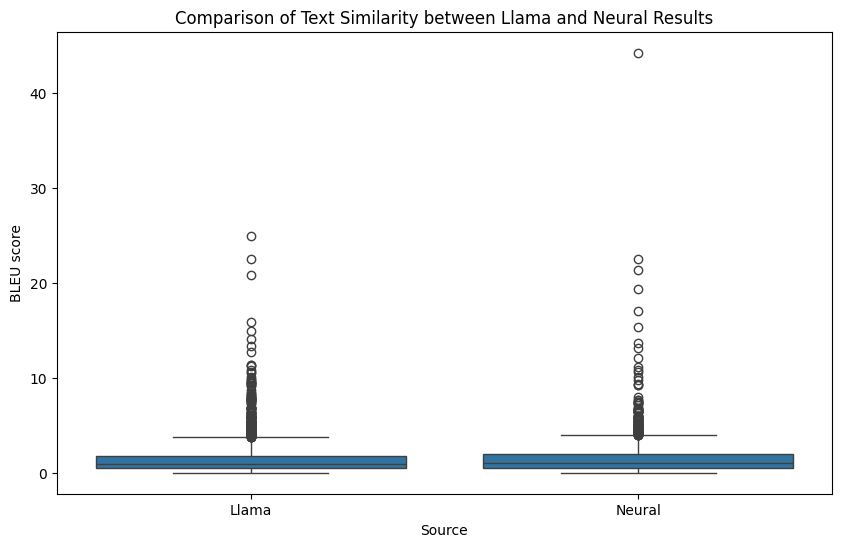

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='BLEU score', data=combined_data)
plt.title('Comparison of Text Similarity between Llama and Neural Results')
plt.show()

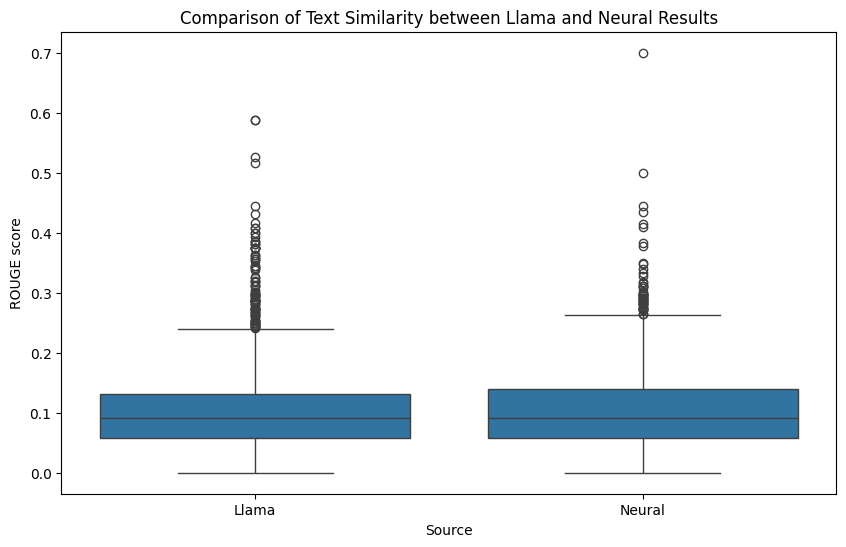

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='ROUGE score', data=combined_data)
plt.title('Comparison of Text Similarity between Llama and Neural Results')
plt.show()

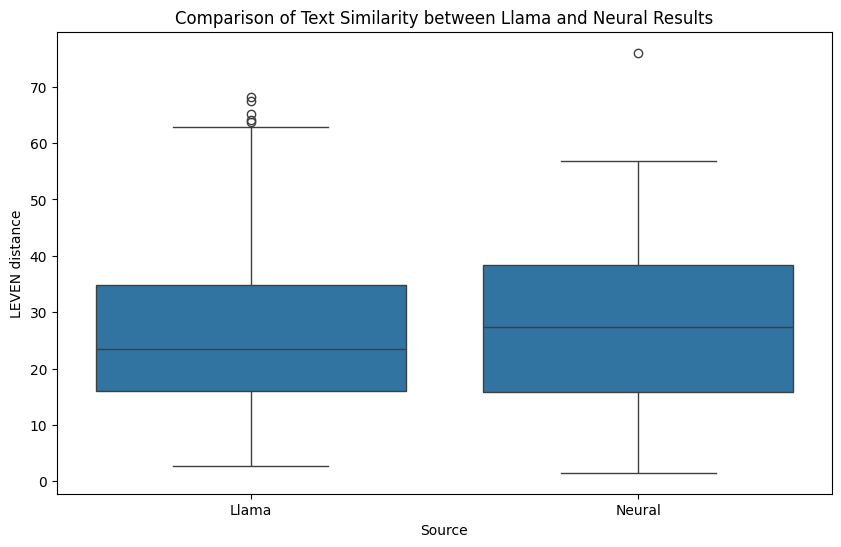

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='LEVEN distance', data=combined_data)
plt.title('Comparison of Text Similarity between Llama and Neural Results')
plt.show()

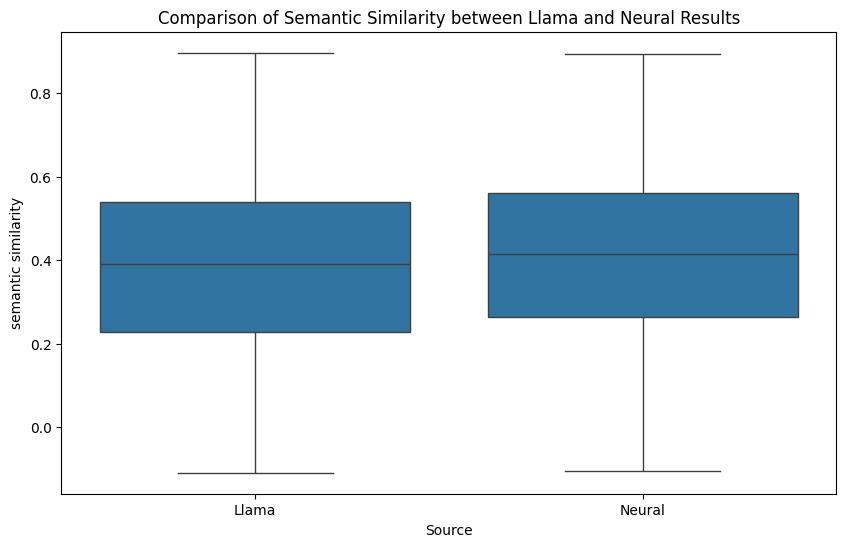

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='semantic similarity', data=combined_data)
plt.title('Comparison of Semantic Similarity between Llama and Neural Results')
plt.show()

In [ ]:
# Splitting the dataframes
llama_empathy_df = llama_combined_df[llama_combined_df['bot'] == 'Empathy Bot']
llama_nonempathy_df = llama_combined_df[llama_combined_df['bot'] == 'Non-Empathy Bot']

neural_empathy_df = neural_combined_df[neural_combined_df['bot'] == 'Empathy Bot']
neural_nonempathy_df = neural_combined_df[neural_combined_df['bot'] == 'Non-Empathy Bot']


In [ ]:
def plot_comparison(dataframe, title, metric_name):
    plt.figure(figsize=(10, 6))
    llm_metric_name = 'LLM ' + metric_name
    baseline_metric_name = 'baseline ' + metric_name
    data_to_plot = [dataframe[baseline_metric_name], dataframe[llm_metric_name]]
    sns.boxplot(data=data_to_plot)
    plt.xticks([0, 1], [baseline_metric_name, llm_metric_name])
    plt.title(title)
    plt.ylabel(metric_name)
    plt.show()

In [ ]:
empathy_rule_metrics = ['person form', 'pronoun', 'tense', 'exclamation',
                        'stimulating dialogue', 'acknowledging', 'collective reasoning',
                        'imperative statement', 'interim questions', 'caring statement']

Person Form

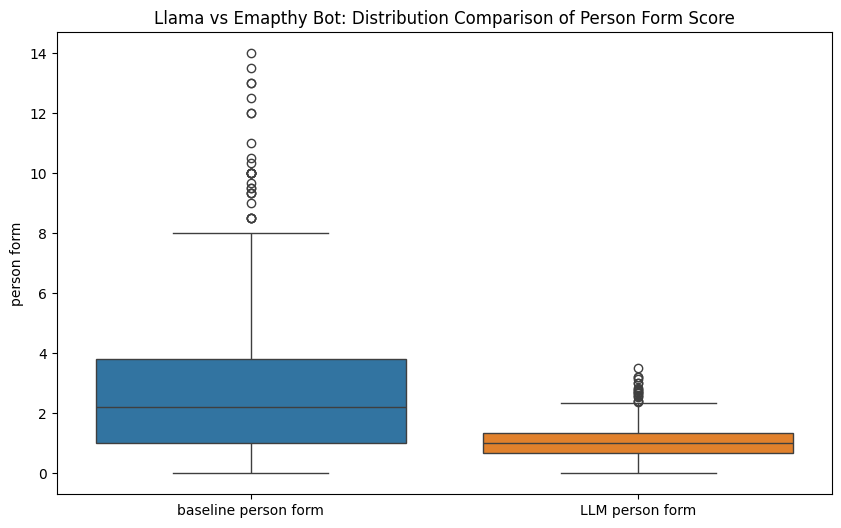

In [ ]:
plot_comparison(llama_empathy_df, 'Llama vs Emapthy Bot: Distribution Comparison of Person Form Score', empathy_rule_metrics[0])

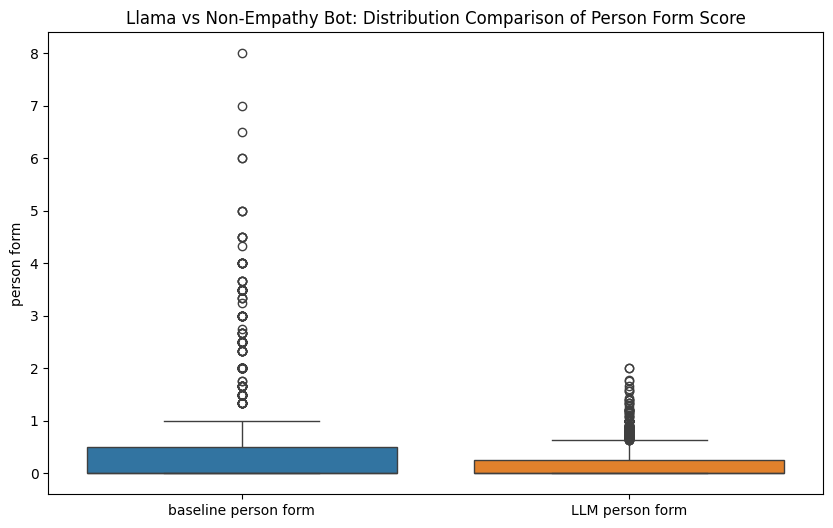

In [ ]:
plot_comparison(llama_nonempathy_df, 'Llama vs Non-Empathy Bot: Distribution Comparison of Person Form Score', empathy_rule_metrics[0])

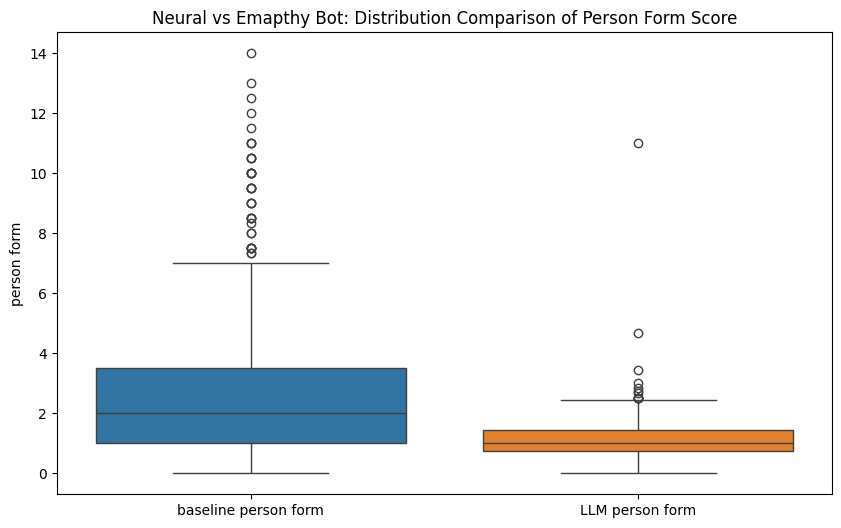

In [ ]:
plot_comparison(neural_empathy_df, 'Neural vs Emapthy Bot: Distribution Comparison of Person Form Score', empathy_rule_metrics[0])

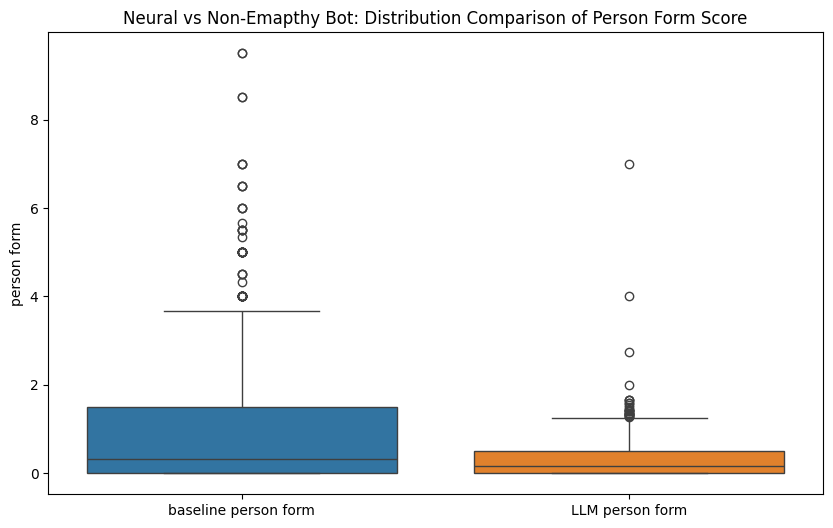

In [ ]:
plot_comparison(neural_nonempathy_df, 'Neural vs Non-Emapthy Bot: Distribution Comparison of Person Form Score', empathy_rule_metrics[0])

Pronoun

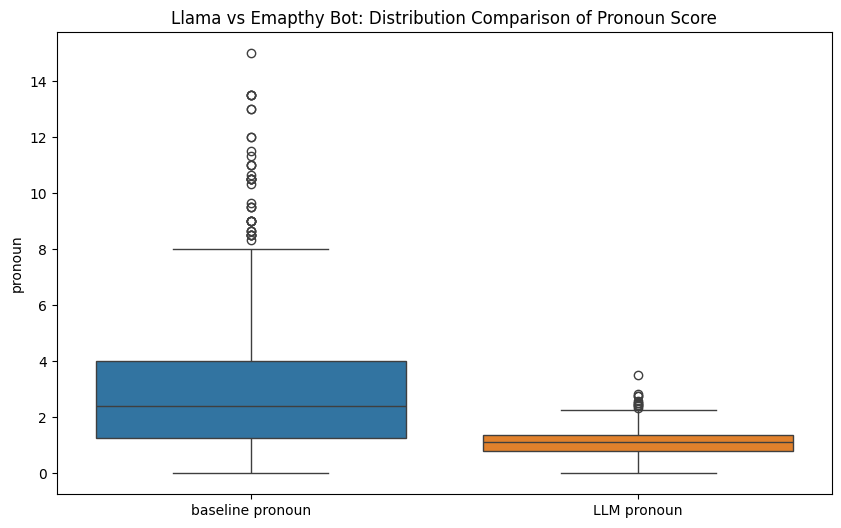

In [ ]:
plot_comparison(llama_empathy_df, 'Llama vs Emapthy Bot: Distribution Comparison of Pronoun Score', empathy_rule_metrics[1])

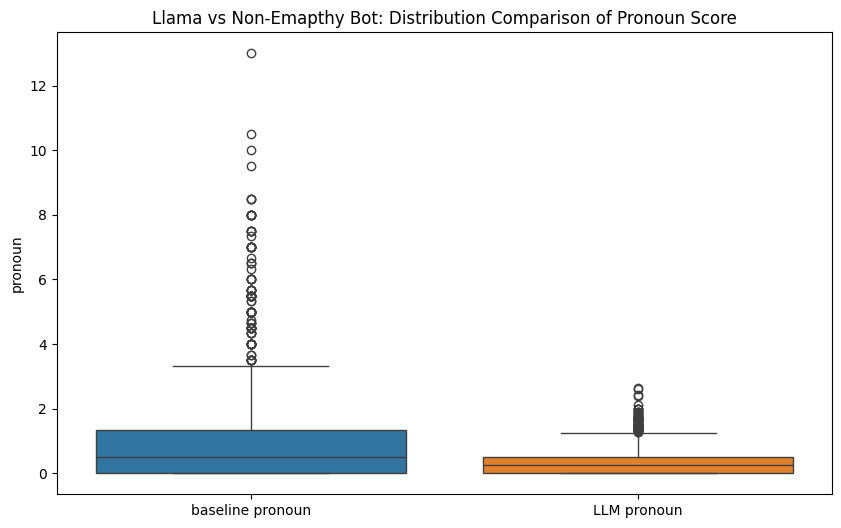

In [ ]:
plot_comparison(llama_nonempathy_df, 'Llama vs Non-Emapthy Bot: Distribution Comparison of Pronoun Score', empathy_rule_metrics[1])

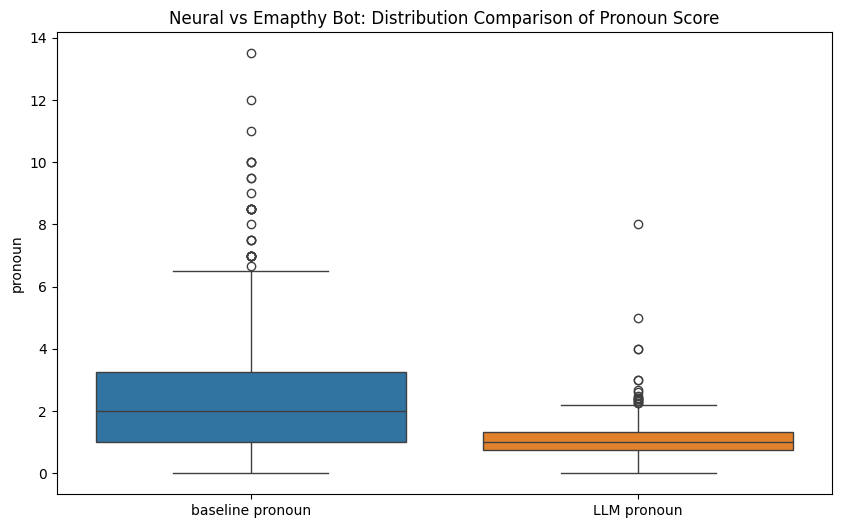

In [ ]:
plot_comparison(neural_empathy_df, 'Neural vs Emapthy Bot: Distribution Comparison of Pronoun Score', empathy_rule_metrics[1])

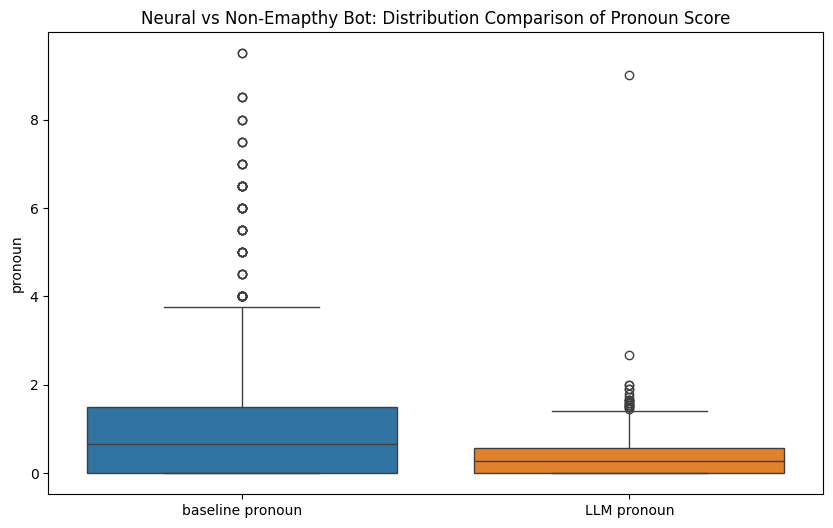

In [ ]:
plot_comparison(neural_nonempathy_df, 'Neural vs Non-Emapthy Bot: Distribution Comparison of Pronoun Score', empathy_rule_metrics[1])

Tense

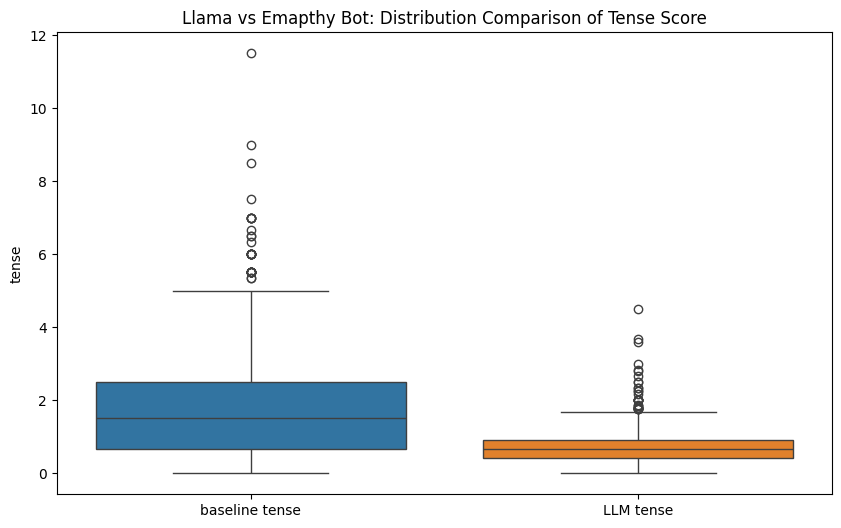

In [ ]:
plot_comparison(llama_empathy_df, 'Llama vs Emapthy Bot: Distribution Comparison of Tense Score', empathy_rule_metrics[2])

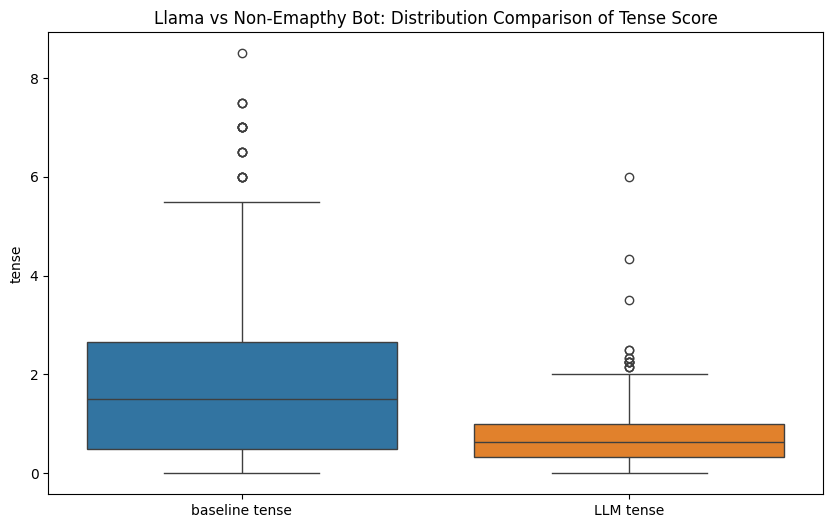

In [ ]:
plot_comparison(llama_nonempathy_df, 'Llama vs Non-Emapthy Bot: Distribution Comparison of Tense Score', empathy_rule_metrics[2])

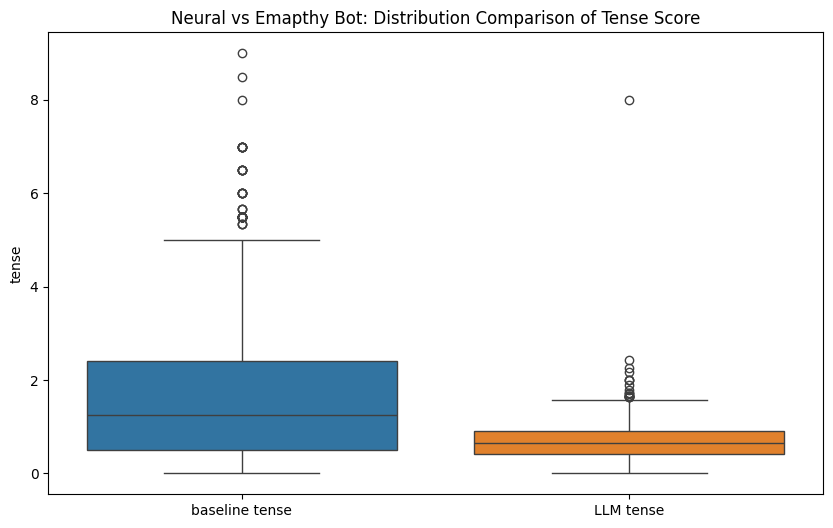

In [ ]:
plot_comparison(neural_empathy_df, 'Neural vs Emapthy Bot: Distribution Comparison of Tense Score', empathy_rule_metrics[2])

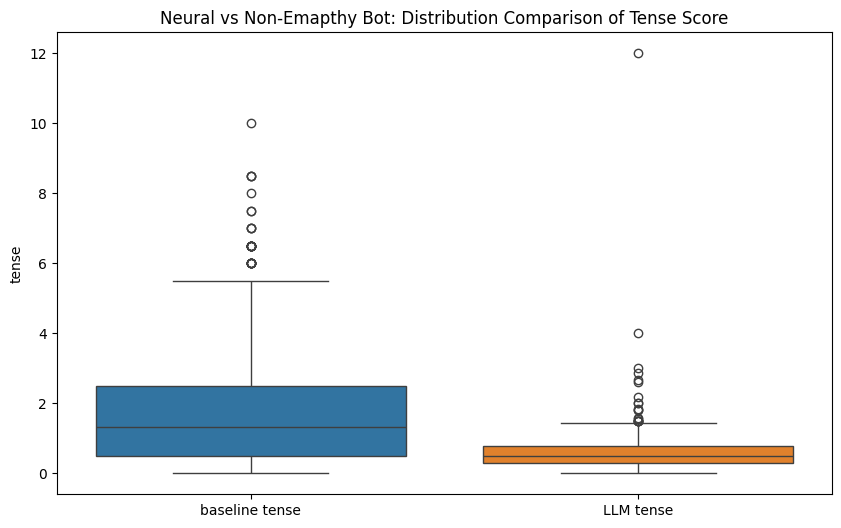

In [ ]:
plot_comparison(neural_nonempathy_df, 'Neural vs Non-Emapthy Bot: Distribution Comparison of Tense Score', empathy_rule_metrics[2])

Exclamation

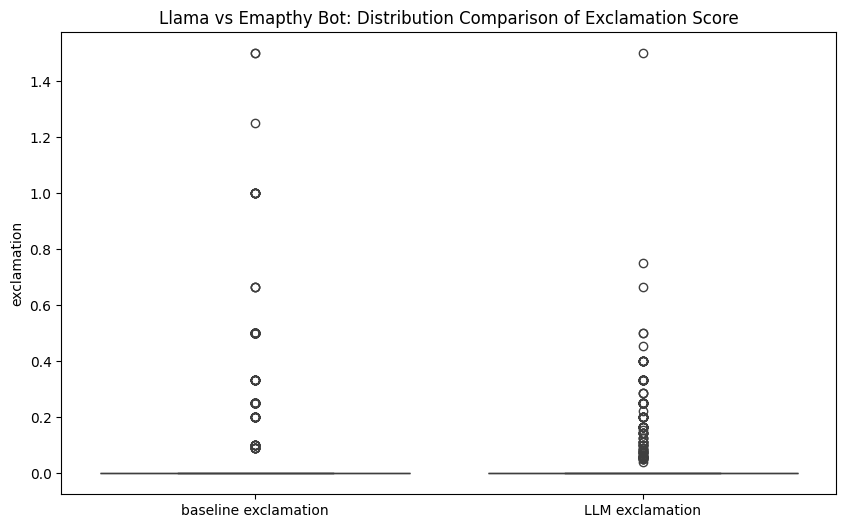

In [ ]:
plot_comparison(llama_empathy_df, 'Llama vs Emapthy Bot: Distribution Comparison of Exclamation Score', empathy_rule_metrics[3])

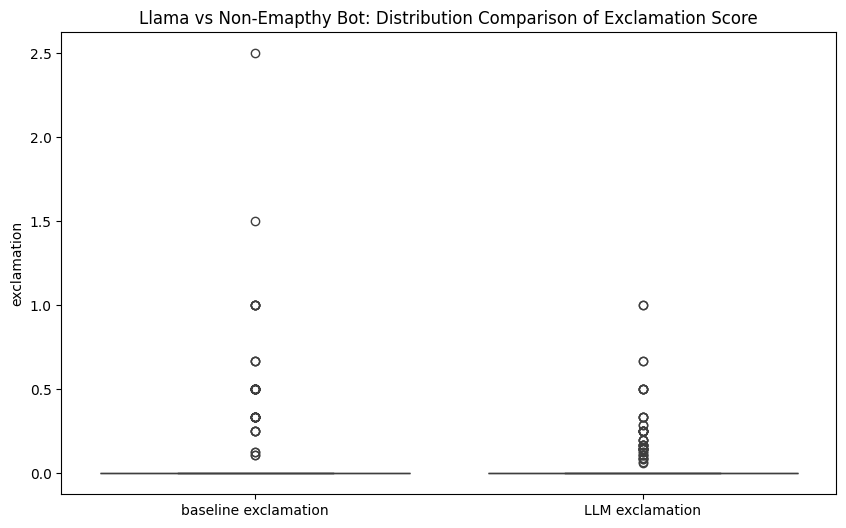

In [ ]:
plot_comparison(llama_nonempathy_df, 'Llama vs Non-Emapthy Bot: Distribution Comparison of Exclamation Score', empathy_rule_metrics[3])

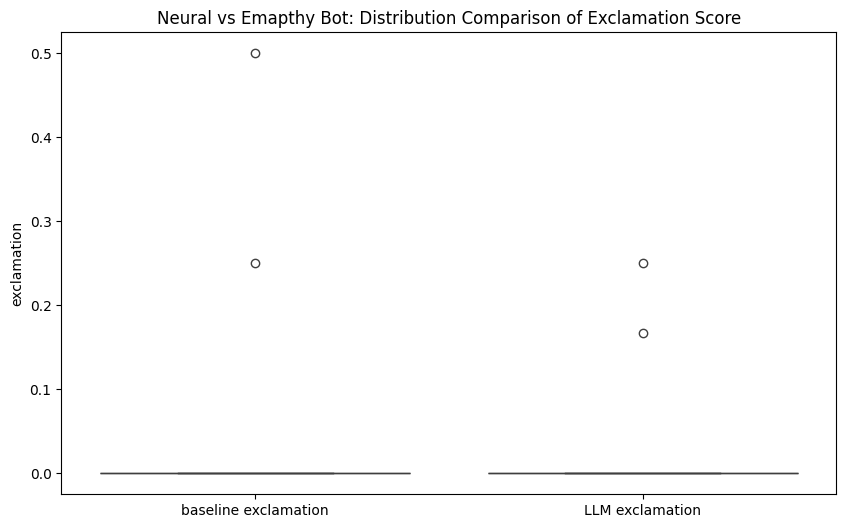

In [ ]:
plot_comparison(neural_empathy_df, 'Neural vs Emapthy Bot: Distribution Comparison of Exclamation Score', empathy_rule_metrics[3])

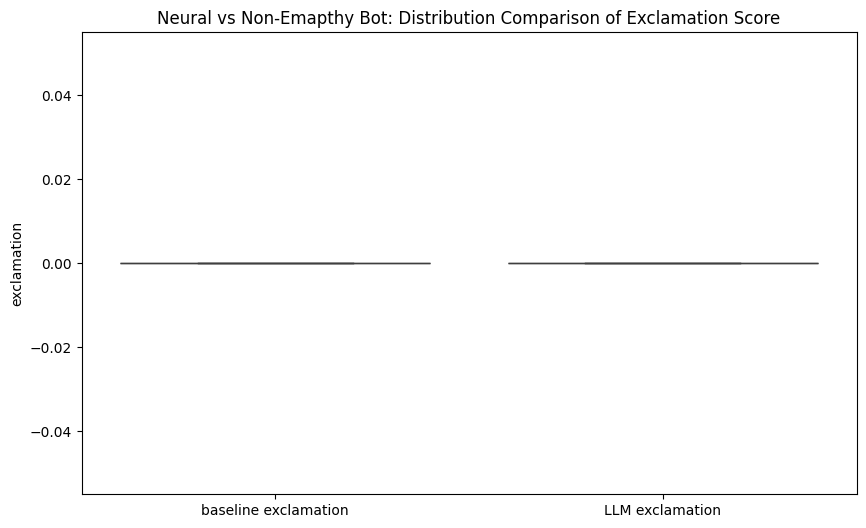

In [ ]:
plot_comparison(neural_nonempathy_df, 'Neural vs Non-Emapthy Bot: Distribution Comparison of Exclamation Score', empathy_rule_metrics[3])

Stimulating Dialogue

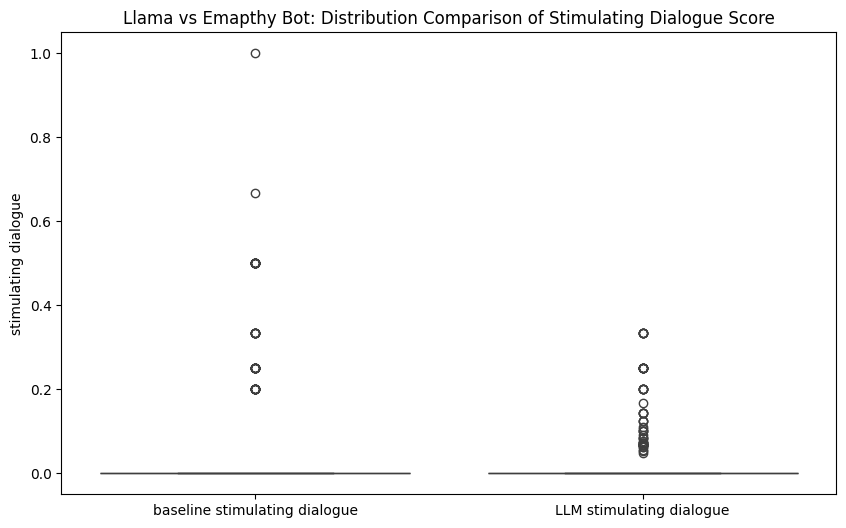

In [ ]:
plot_comparison(llama_empathy_df, 'Llama vs Emapthy Bot: Distribution Comparison of Stimulating Dialogue Score', empathy_rule_metrics[4])

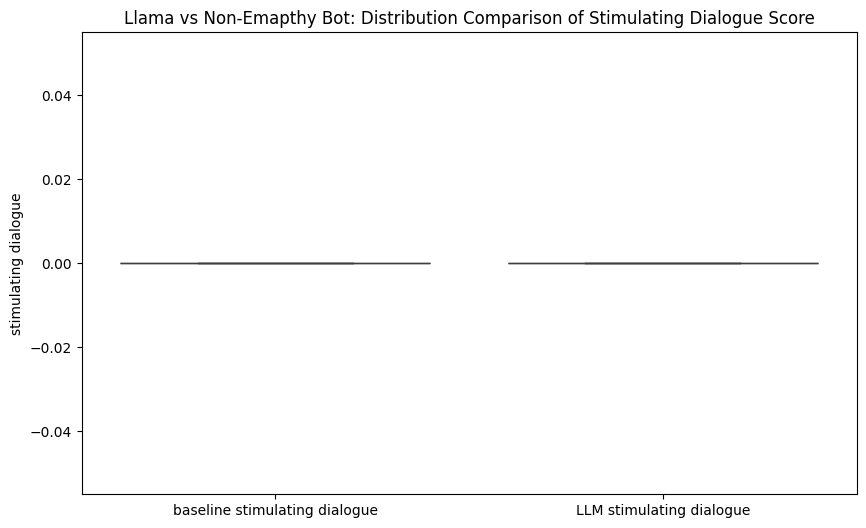

In [ ]:
plot_comparison(llama_nonempathy_df, 'Llama vs Non-Emapthy Bot: Distribution Comparison of Stimulating Dialogue Score', empathy_rule_metrics[4])

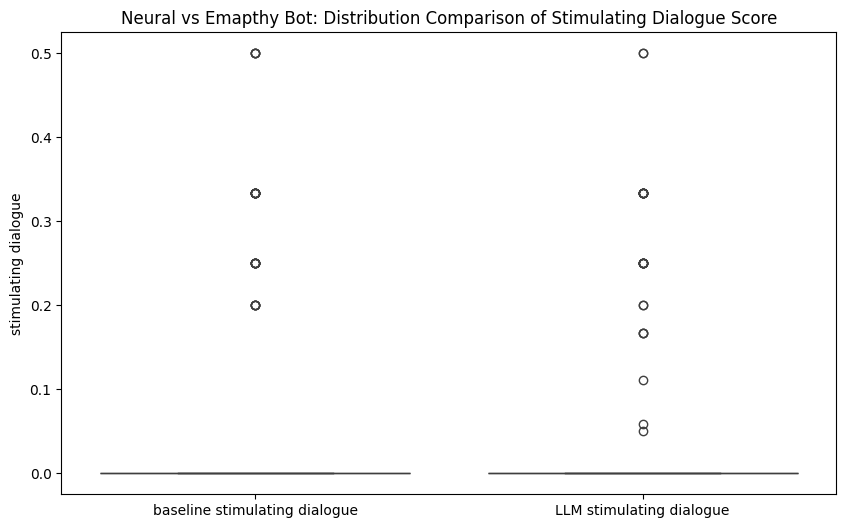

In [ ]:
plot_comparison(neural_empathy_df, 'Neural vs Emapthy Bot: Distribution Comparison of Stimulating Dialogue Score', empathy_rule_metrics[4])

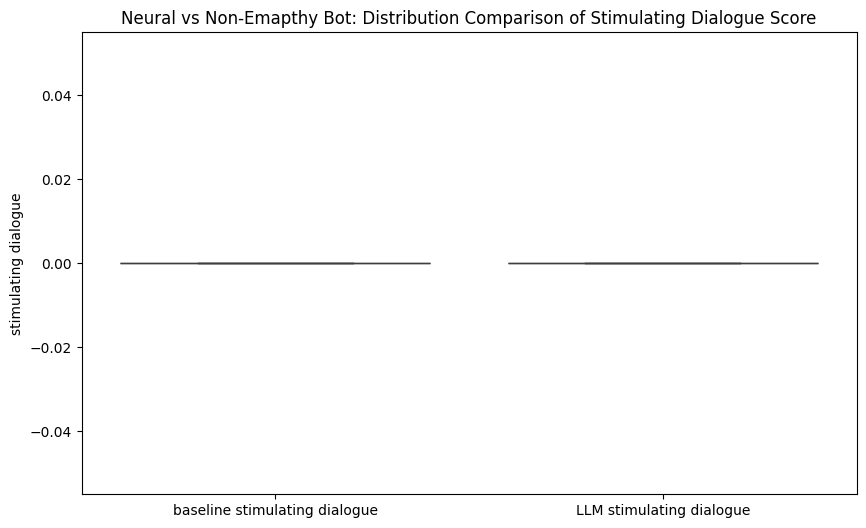

In [ ]:
plot_comparison(neural_nonempathy_df, 'Neural vs Non-Emapthy Bot: Distribution Comparison of Stimulating Dialogue Score', empathy_rule_metrics[4])

Acknowledging

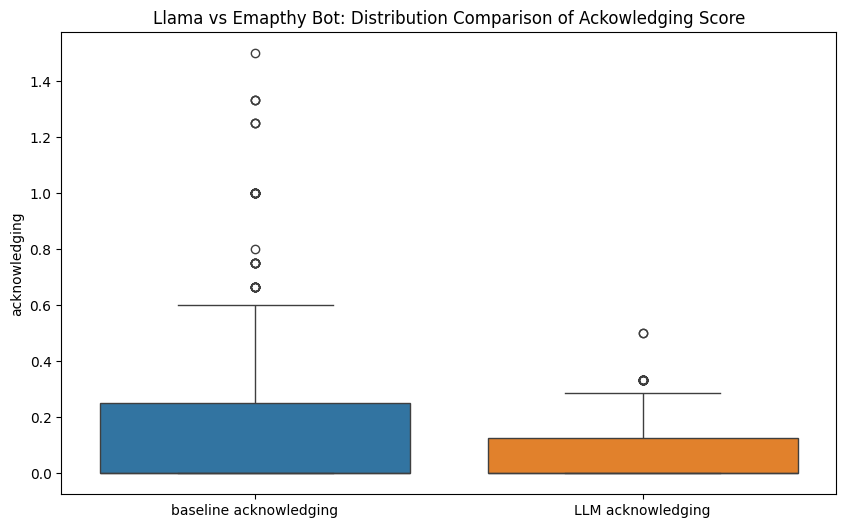

In [ ]:
plot_comparison(llama_empathy_df, 'Llama vs Emapthy Bot: Distribution Comparison of Ackowledging Score', empathy_rule_metrics[5])

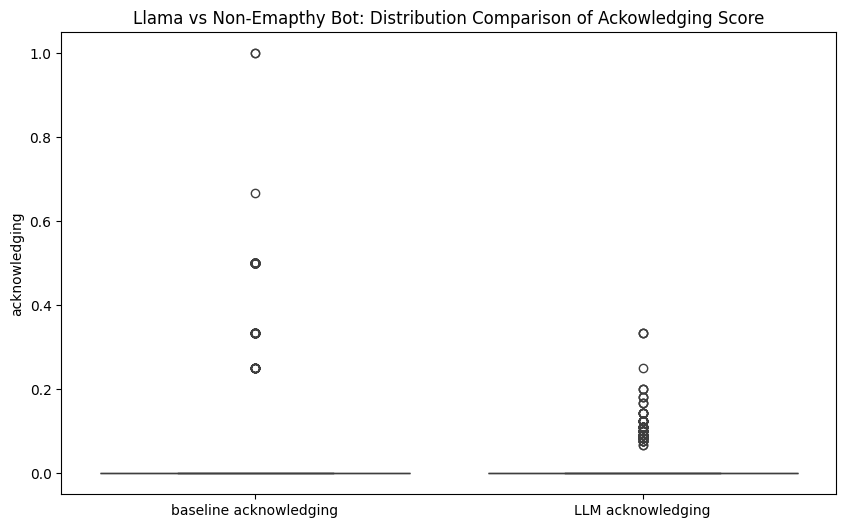

In [ ]:
plot_comparison(llama_nonempathy_df, 'Llama vs Non-Emapthy Bot: Distribution Comparison of Ackowledging Score', empathy_rule_metrics[5])

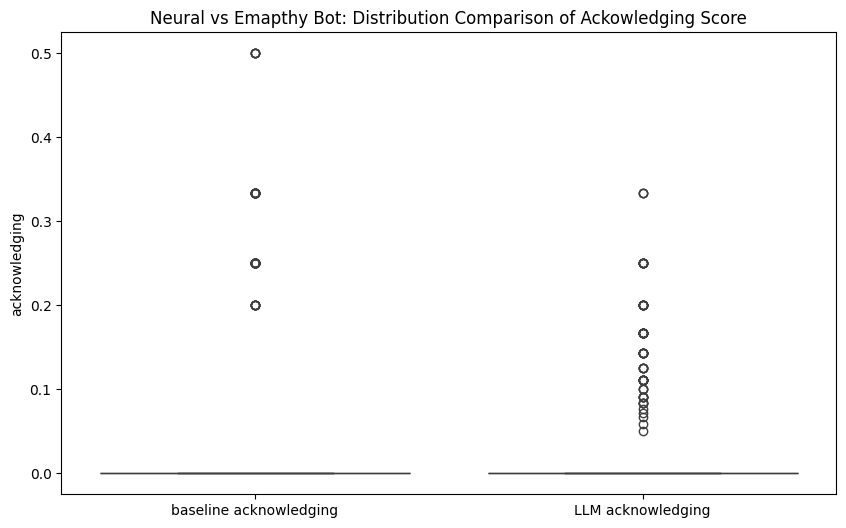

In [ ]:
plot_comparison(neural_empathy_df, 'Neural vs Emapthy Bot: Distribution Comparison of Ackowledging Score', empathy_rule_metrics[5])

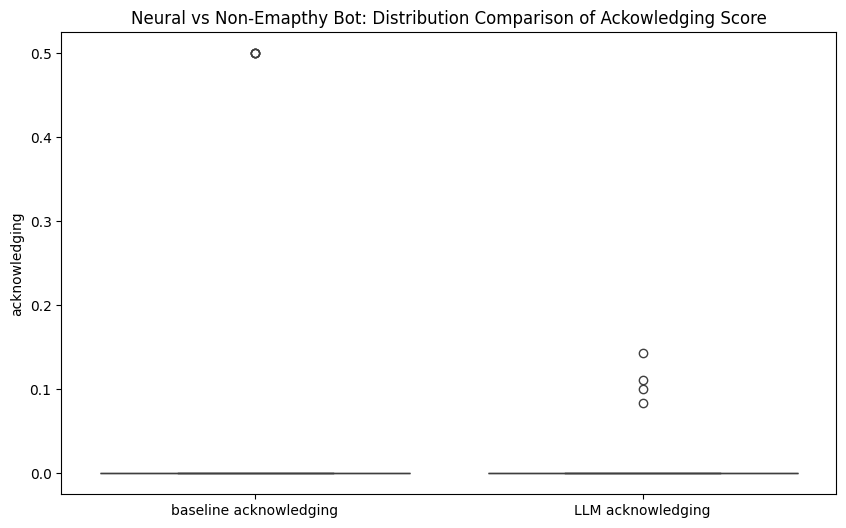

In [ ]:
plot_comparison(neural_nonempathy_df, 'Neural vs Non-Emapthy Bot: Distribution Comparison of Ackowledging Score', empathy_rule_metrics[5])

Collective Reasoning

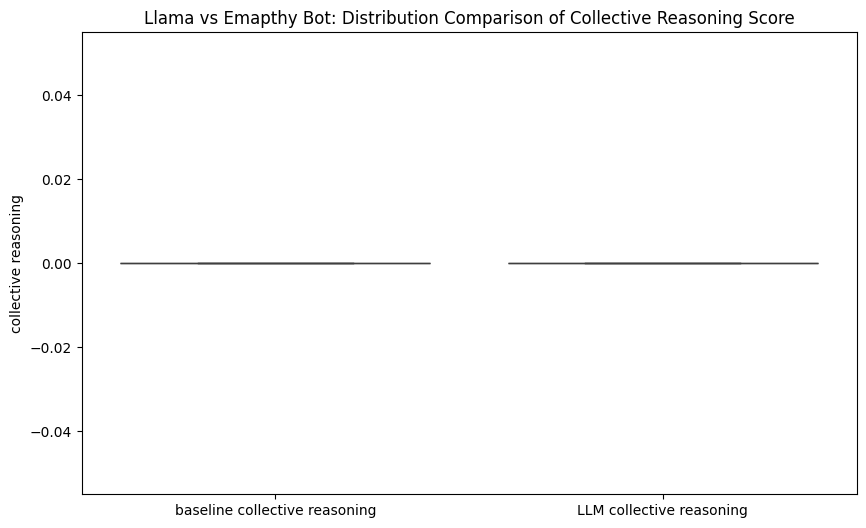

In [ ]:
plot_comparison(llama_empathy_df, 'Llama vs Emapthy Bot: Distribution Comparison of Collective Reasoning Score', empathy_rule_metrics[6])

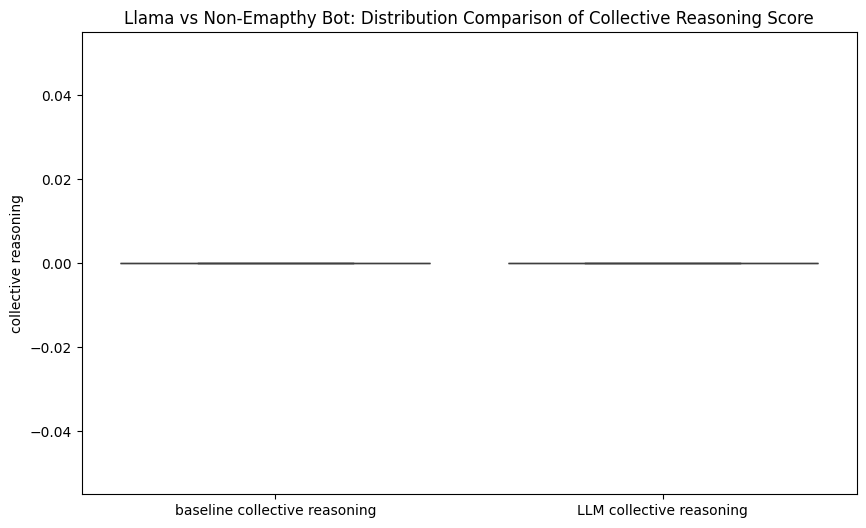

In [ ]:
plot_comparison(llama_nonempathy_df, 'Llama vs Non-Emapthy Bot: Distribution Comparison of Collective Reasoning Score', empathy_rule_metrics[6])

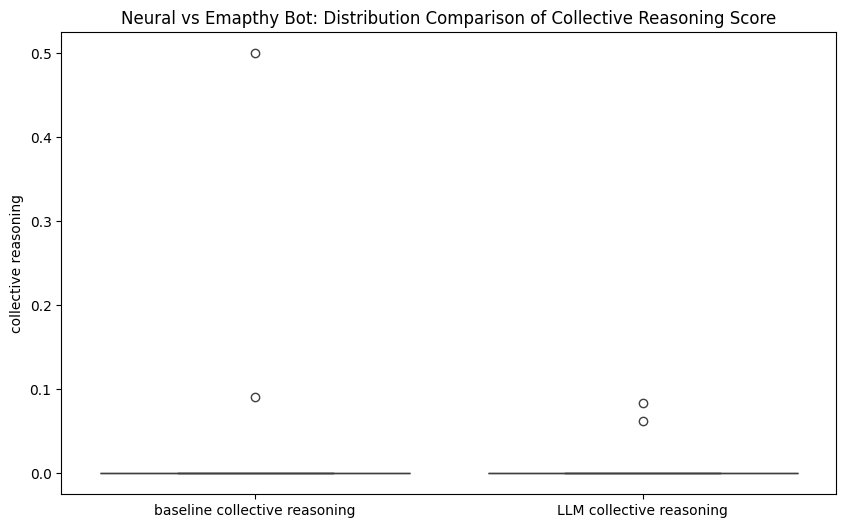

In [ ]:
plot_comparison(neural_empathy_df, 'Neural vs Emapthy Bot: Distribution Comparison of Collective Reasoning Score', empathy_rule_metrics[6])

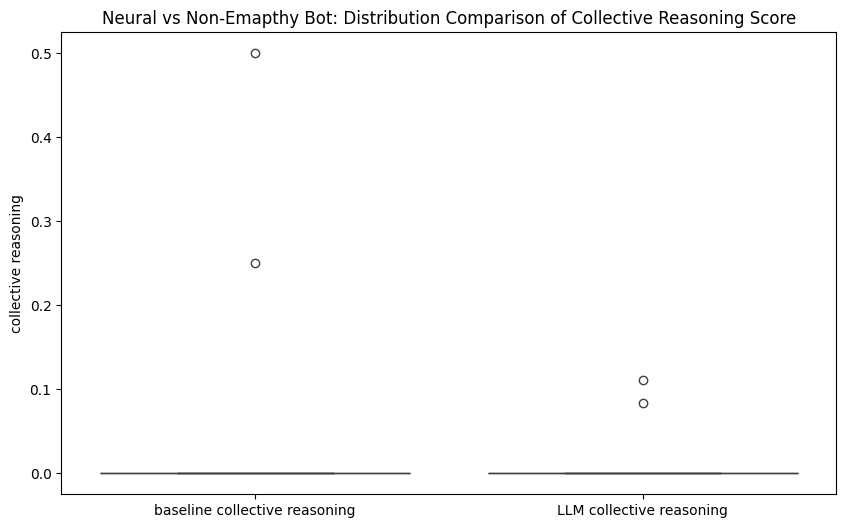

In [ ]:
plot_comparison(neural_nonempathy_df, 'Neural vs Non-Emapthy Bot: Distribution Comparison of Collective Reasoning Score', empathy_rule_metrics[6])

Imperative Statement

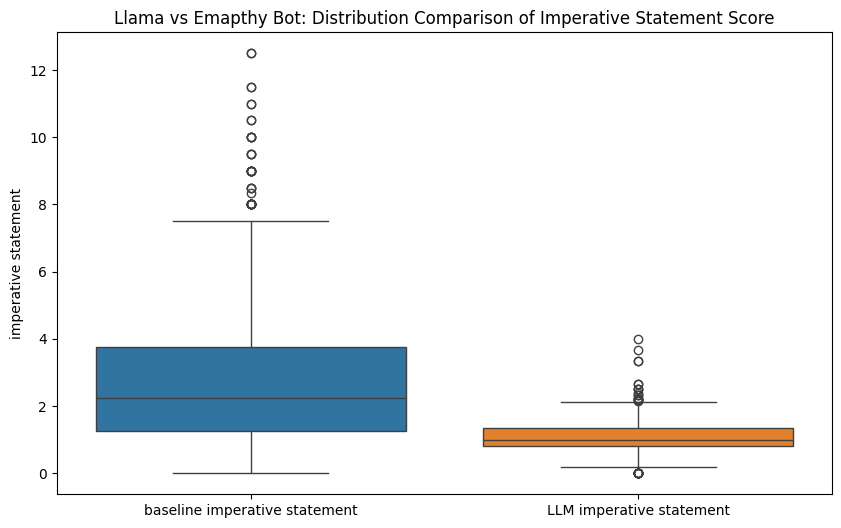

In [ ]:
plot_comparison(llama_empathy_df, 'Llama vs Emapthy Bot: Distribution Comparison of Imperative Statement Score', empathy_rule_metrics[7])

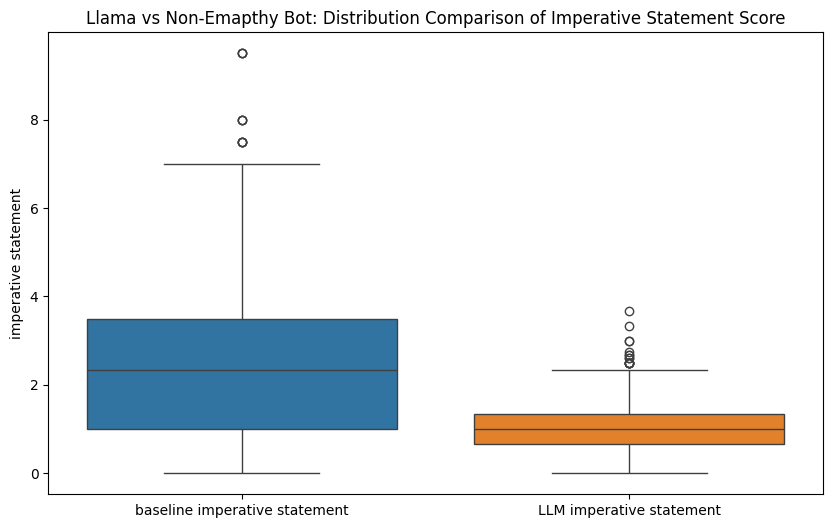

In [ ]:
plot_comparison(llama_nonempathy_df, 'Llama vs Non-Emapthy Bot: Distribution Comparison of Imperative Statement Score', empathy_rule_metrics[7])

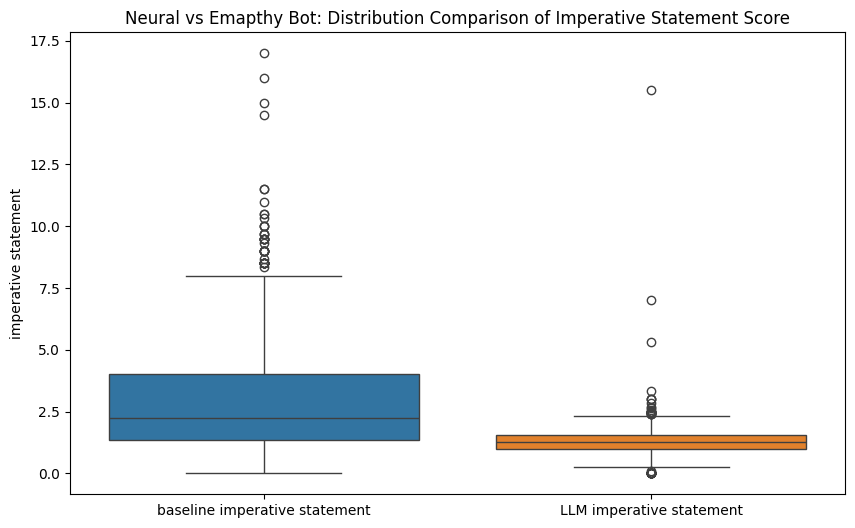

In [ ]:
plot_comparison(neural_empathy_df, 'Neural vs Emapthy Bot: Distribution Comparison of Imperative Statement Score', empathy_rule_metrics[7])

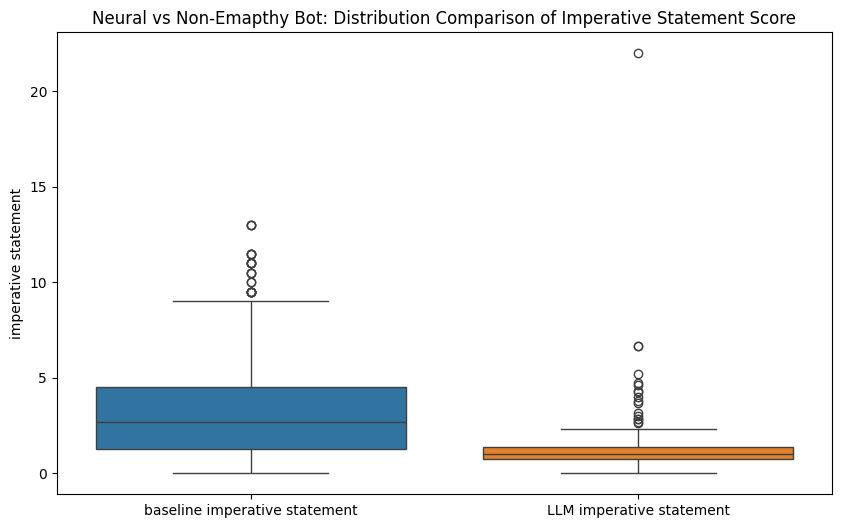

In [ ]:
plot_comparison(neural_nonempathy_df, 'Neural vs Non-Emapthy Bot: Distribution Comparison of Imperative Statement Score', empathy_rule_metrics[7])

Interim Questions

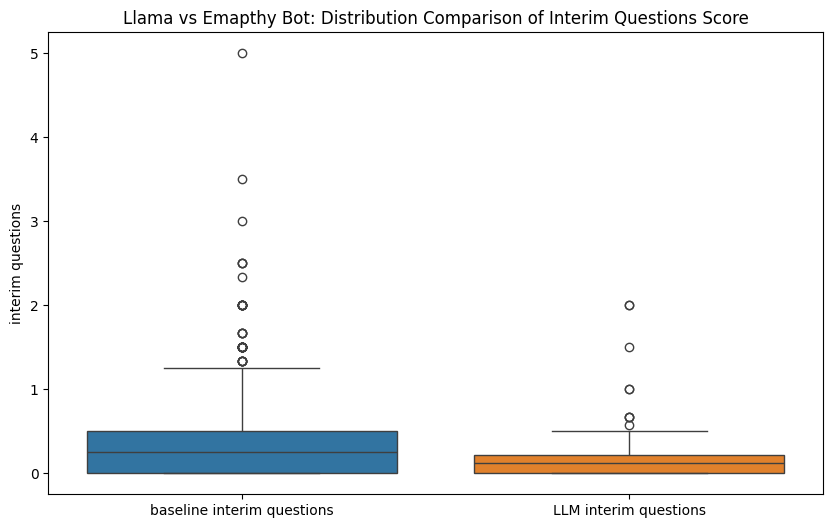

In [ ]:
plot_comparison(llama_empathy_df, 'Llama vs Emapthy Bot: Distribution Comparison of Interim Questions Score', empathy_rule_metrics[8])

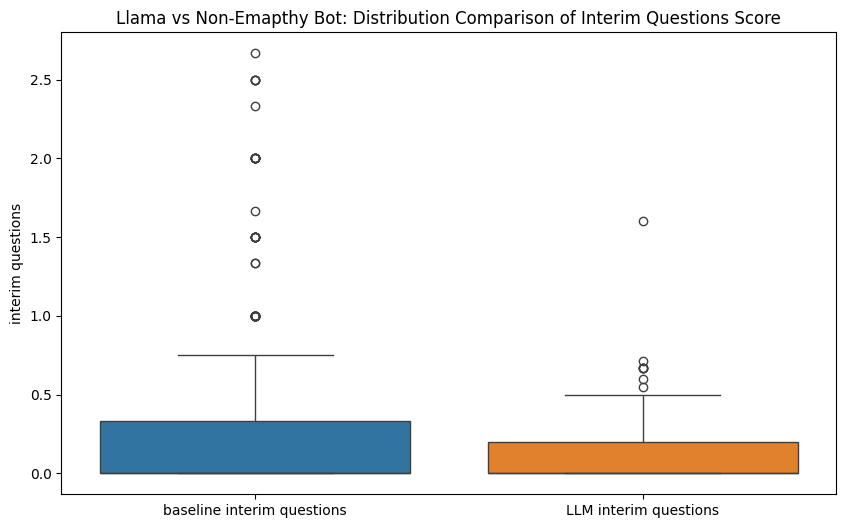

In [ ]:
plot_comparison(llama_nonempathy_df, 'Llama vs Non-Emapthy Bot: Distribution Comparison of Interim Questions Score', empathy_rule_metrics[8])

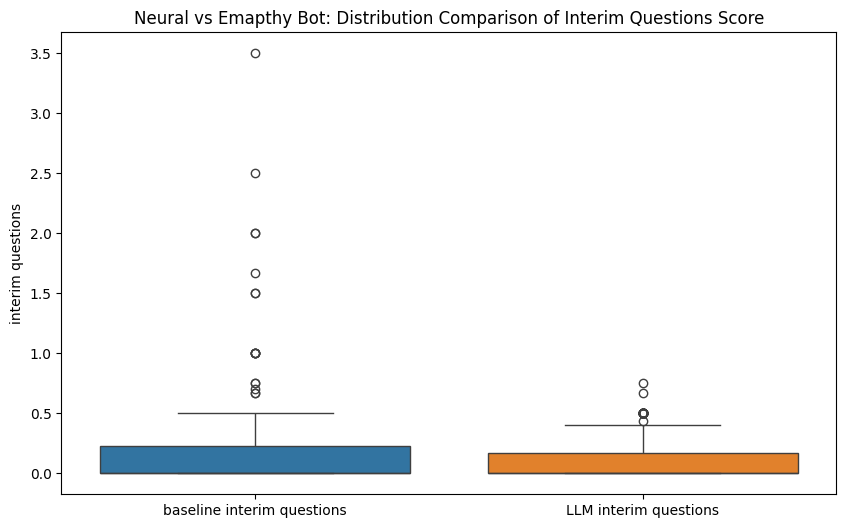

In [ ]:
plot_comparison(neural_empathy_df, 'Neural vs Emapthy Bot: Distribution Comparison of Interim Questions Score', empathy_rule_metrics[8])

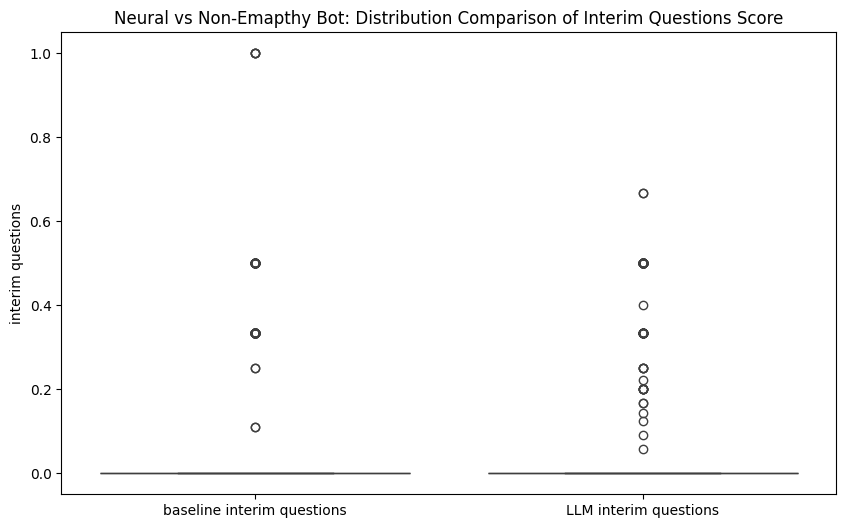

In [ ]:
plot_comparison(neural_nonempathy_df, 'Neural vs Non-Emapthy Bot: Distribution Comparison of Interim Questions Score', empathy_rule_metrics[8])

Caring Statement

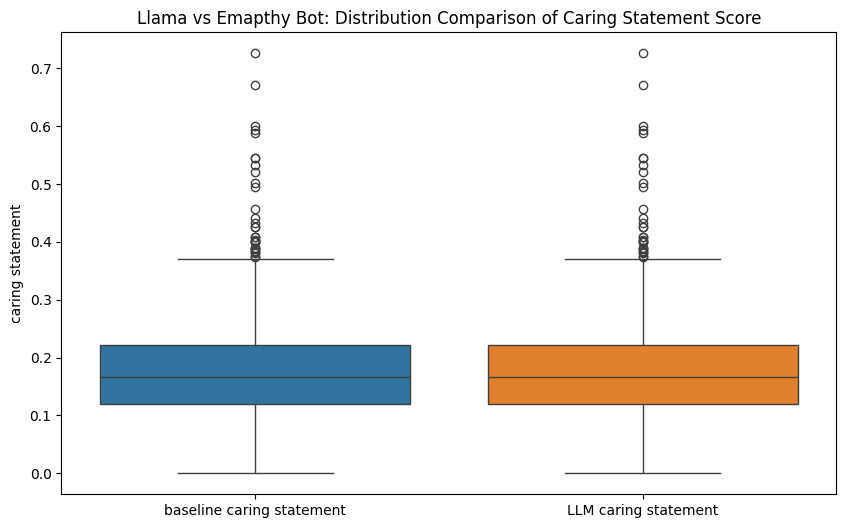

In [ ]:
plot_comparison(llama_empathy_df, 'Llama vs Emapthy Bot: Distribution Comparison of Caring Statement Score', empathy_rule_metrics[9])

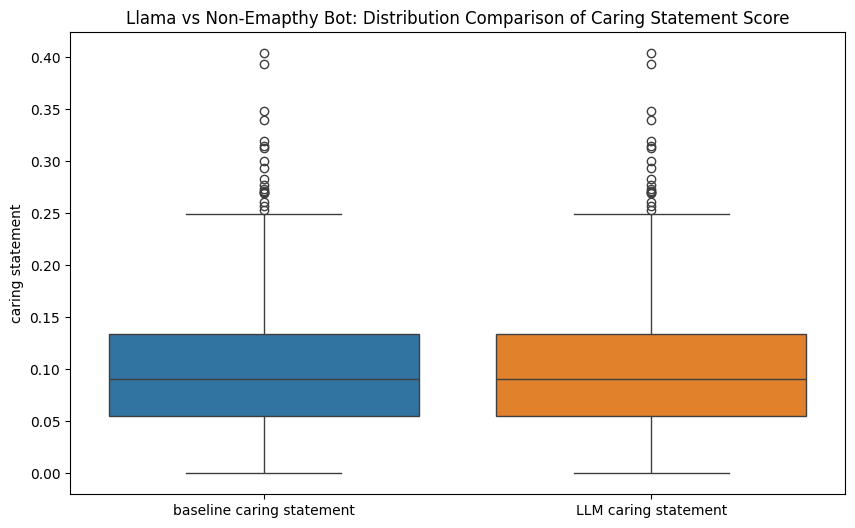

In [ ]:
plot_comparison(llama_nonempathy_df, 'Llama vs Non-Emapthy Bot: Distribution Comparison of Caring Statement Score', empathy_rule_metrics[9])

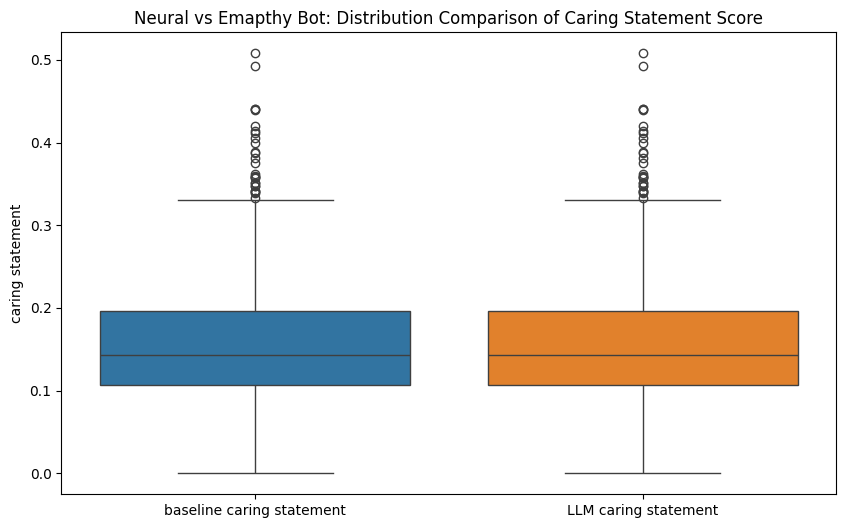

In [ ]:
plot_comparison(neural_empathy_df, 'Neural vs Emapthy Bot: Distribution Comparison of Caring Statement Score', empathy_rule_metrics[9])

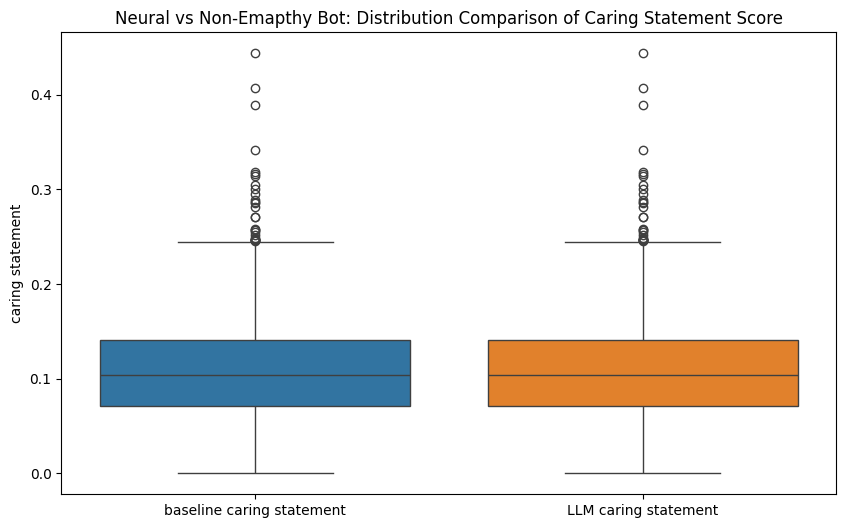

In [ ]:
plot_comparison(neural_nonempathy_df, 'Neural vs Non-Emapthy Bot: Distribution Comparison of Caring Statement Score', empathy_rule_metrics[9])

Composite Table for descriptive analysis

In [ ]:
metric_names = ['BLEU score', 'ROUGE score', 'LEVEN distance', 'semantic similarity', 'factual consistency']

In [ ]:
data_for_df = []

In [ ]:
# Iterate through each metric to gather stats across all categories
for metric in metric_names:
    row = {'Metric': metric}  # Start with a dictionary containing the metric name
    for dataframe, label in zip([llama_empathy_df, llama_nonempathy_df, neural_empathy_df, neural_nonempathy_df],
                                ['Llama Empathy', 'Llama Non-Empathy', 'Neural Empathy', 'Neural Non-Empathy']):
        # Calculate descriptive statistics for the current metric in the current DataFrame
        stats = dataframe[metric].agg(['mean', 'std', 'min', 'max'])
        # Add these stats to the row dictionary, prefixed with the category label
        for stat in ['mean', 'std', 'min', 'max']:
            row[f'{label} {stat.capitalize()}'] = stats[stat]
    data_for_df.append(row)

In [ ]:
composite_df = pd.DataFrame(data_for_df)

In [ ]:
print(composite_df.head())

                Metric  Llama Empathy Mean  Llama Empathy Std  \
0           BLEU score            1.476341           1.701123   
1          ROUGE score            0.102441           0.057203   
2       LEVEN distance           26.160348          10.644595   
3  semantic similarity            0.348570           0.207350   
4  factual consistency           -0.217062           0.441333   

   Llama Empathy Min  Llama Empathy Max  Llama Non-Empathy Mean  \
0            0.00000          24.929777                1.682999   
1            0.00000           0.415584                0.108019   
2            4.64756          57.420925               23.891558   
3           -0.10895           0.872356                0.422900   
4           -1.00000           1.000000               -0.100529   

   Llama Non-Empathy Std  Llama Non-Empathy Min  Llama Non-Empathy Max  \
0               2.197072               0.000000              20.828838   
1               0.082334               0.000000           

In [ ]:
# Initialize a dictionary to hold the formatted data
formatted_data = {category: [] for category in ['Llama Empathy', 'Llama Non-Empathy', 'Neural Empathy', 'Neural Non-Empathy']}

# Add a 'Metric' key to hold the metric names
formatted_data['Metric'] = metric_names

# Iterate over each metric to populate the dictionary
for metric in metric_names:
    for category in ['Llama Empathy', 'Llama Non-Empathy', 'Neural Empathy', 'Neural Non-Empathy']:
        # For each metric-category combination, format the statistics into a string
        stats = composite_df.loc[composite_df['Metric'] == metric, [f'{category} Min', f'{category} Mean', f'{category} Max', f'{category} Std']].values
        if stats.size > 0:
            min_val, mean_val, max_val, std_val = stats[0]
            stats_str = f"Min: {min_val:.2f}, Mean: {mean_val:.2f}, Max: {max_val:.2f}, Std: {std_val:.2f}"
        else:
            stats_str = "Min: NaN, Mean: NaN, Max: NaN, Std: NaN"

        # Append the formatted string to the corresponding category in the dictionary
        formatted_data[category].append(stats_str)

# Convert the dictionary into a DataFrame for a structured view
formatted_df = pd.DataFrame(formatted_data)

# Print the DataFrame to display the table
print(formatted_df.to_string(index=False))


                                 Llama Empathy                              Llama Non-Empathy                                 Neural Empathy                             Neural Non-Empathy              Metric
  Min: 0.00, Mean: 1.48, Max: 24.93, Std: 1.70   Min: 0.00, Mean: 1.68, Max: 20.83, Std: 2.20   Min: 0.00, Mean: 1.49, Max: 21.35, Std: 1.57   Min: 0.00, Mean: 1.57, Max: 44.29, Std: 2.31          BLEU score
   Min: 0.00, Mean: 0.10, Max: 0.42, Std: 0.06    Min: 0.00, Mean: 0.11, Max: 0.59, Std: 0.08    Min: 0.00, Mean: 0.10, Max: 0.41, Std: 0.06    Min: 0.00, Mean: 0.10, Max: 0.70, Std: 0.08         ROUGE score
Min: 4.65, Mean: 26.16, Max: 57.42, Std: 10.64 Min: 2.78, Mean: 23.89, Max: 68.24, Std: 13.42 Min: 3.56, Mean: 28.55, Max: 56.82, Std: 11.34 Min: 1.52, Mean: 24.65, Max: 76.03, Std: 14.05      LEVEN distance
  Min: -0.11, Mean: 0.35, Max: 0.87, Std: 0.21   Min: -0.05, Mean: 0.42, Max: 0.90, Std: 0.20   Min: -0.05, Mean: 0.38, Max: 0.89, Std: 0.21   Min: -0.11, Mean: 0.43, M

In [ ]:
# Convert the DataFrame to LaTeX code
latex_code = formatted_df.to_latex()

# Print the LaTeX code
print(latex_code)

\begin{tabular}{llllll}
\toprule
{} &                                   Llama Empathy &                               Llama Non-Empathy &                                  Neural Empathy &                              Neural Non-Empathy &               Metric \\
\midrule
0 &    Min: 0.00, Mean: 1.48, Max: 24.93, Std: 1.70 &    Min: 0.00, Mean: 1.68, Max: 20.83, Std: 2.20 &    Min: 0.00, Mean: 1.49, Max: 21.35, Std: 1.57 &    Min: 0.00, Mean: 1.57, Max: 44.29, Std: 2.31 &           BLEU score \\
1 &     Min: 0.00, Mean: 0.10, Max: 0.42, Std: 0.06 &     Min: 0.00, Mean: 0.11, Max: 0.59, Std: 0.08 &     Min: 0.00, Mean: 0.10, Max: 0.41, Std: 0.06 &     Min: 0.00, Mean: 0.10, Max: 0.70, Std: 0.08 &          ROUGE score \\
2 &  Min: 4.65, Mean: 26.16, Max: 57.42, Std: 10.64 &  Min: 2.78, Mean: 23.89, Max: 68.24, Std: 13.42 &  Min: 3.56, Mean: 28.55, Max: 56.82, Std: 11.34 &  Min: 1.52, Mean: 24.65, Max: 76.03, Std: 14.05 &       LEVEN distance \\
3 &    Min: -0.11, Mean: 0.35, Max: 0.87, Std

<ipython-input-64-4df26761c2e9>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = formatted_df.to_latex()


In [ ]:
# Define the folder path
folder_path = '/content/drive/My Drive/results1/'

# Patterns for two types of files
pattern_llama = os.path.join(folder_path, 'llama_results_*.csv')
pattern_neural = os.path.join(folder_path, 'neural_results_*.csv')

# Find files for each type
llama_files = sorted(glob.glob(pattern_llama), key=extract_number)
neural_files = sorted(glob.glob(pattern_neural), key=extract_number)

In [ ]:
# reading process to ignore the first column
llama_dfs = [pd.read_csv(file, index_col=0) for file in llama_files]
neural_dfs = [pd.read_csv(file, index_col=0) for file in neural_files]

# Concatenate the DataFrames
llama_combined_df1 = pd.concat(llama_dfs, ignore_index=True)
neural_combined_df1 = pd.concat(neural_dfs, ignore_index=True)


In [ ]:
# Splitting the dataframes
llama_empathy_df1 = llama_combined_df1[llama_combined_df1['bot'] == 'Empathy Bot']
llama_nonempathy_df1 = llama_combined_df1[llama_combined_df1['bot'] == 'Non-Empathy Bot']

neural_empathy_df1 = neural_combined_df1[neural_combined_df1['bot'] == 'Empathy Bot']
neural_nonempathy_df1 = neural_combined_df1[neural_combined_df1['bot'] == 'Non-Empathy Bot']

T-Tests

In [ ]:
import scipy.stats as stats

In [ ]:
empathy_rule_metrics = ['person form', 'pronoun', 'tense', 'exclamation',
                        'stimulating dialogue', 'acknowledging', 'collective reasoning',
                        'imperative statement', 'interim questions', 'caring statement']

**person form**

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM person form'], neural_combined_df1['LLM person form'], alternative='two-sided')

TtestResult(statistic=-4.84285129103111, pvalue=1.3283193232256417e-06, df=3998.0)

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM person form'], llama_combined_df1['baseline person form'], alternative='less')

TtestResult(statistic=-21.96767168044087, pvalue=2.2377941569590792e-101, df=3998.0)

In [ ]:
stats.ttest_ind(neural_combined_df1['LLM person form'], neural_combined_df1['baseline person form'], alternative='less')

TtestResult(statistic=-22.24698487458771, pvalue=9.023307115292296e-104, df=3998.0)

pronoun

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM pronoun'], neural_combined_df1['LLM pronoun'], alternative='two-sided')

TtestResult(statistic=0.7937932742194922, pvalue=0.42736289867313415, df=3998.0)

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM pronoun'], llama_combined_df1['baseline pronoun'], alternative='less')

TtestResult(statistic=-25.38936770981005, pvalue=2.8329945137935475e-132, df=3998.0)

tense

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM tense'], neural_combined_df1['LLM tense'], alternative='two-sided')

TtestResult(statistic=5.455463327866853, pvalue=5.180223303380869e-08, df=3998.0)

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM tense'], llama_combined_df1['baseline tense'], alternative='less')

TtestResult(statistic=-31.496833457164772, pvalue=5.275549633549619e-195, df=3998.0)

In [ ]:
stats.ttest_ind(neural_combined_df1['LLM tense'], neural_combined_df1['baseline tense'], alternative='less')

TtestResult(statistic=-28.441454717061696, pvalue=1.655323230847262e-162, df=3998.0)

exclamation

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM exclamation'], neural_combined_df1['LLM exclamation'], alternative='two-sided')

TtestResult(statistic=11.330756092000986, pvalue=2.575115987449742e-29, df=3998.0)

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM exclamation'], llama_combined_df1['baseline exclamation'], alternative='less')

TtestResult(statistic=-4.54719485873988, pvalue=2.7987629465927916e-06, df=3998.0)

In [ ]:
stats.ttest_ind(neural_combined_df1['LLM exclamation'], neural_combined_df1['baseline exclamation'], alternative='less')

TtestResult(statistic=-0.5253344869622423, pvalue=0.29968990963511316, df=3998.0)

stimulating dialogue

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM stimulating dialogue'], neural_combined_df1['LLM stimulating dialogue'], alternative='two-sided')

TtestResult(statistic=0.8694708636037645, pvalue=0.38464183285504694, df=3998.0)

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM stimulating dialogue'], llama_combined_df1['baseline stimulating dialogue'], alternative='less')

TtestResult(statistic=-3.4501184984114515, pvalue=0.0002830687702037346, df=3998.0)

*acknowledging*

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM acknowledging'], neural_combined_df1['LLM acknowledging'], alternative='two-sided')

TtestResult(statistic=18.863135392165304, pvalue=4.223687638345034e-76, df=3998.0)

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM acknowledging'], llama_combined_df1['baseline acknowledging'], alternative='less')

TtestResult(statistic=-14.034614217499268, pvalue=5.135868649606343e-44, df=3998.0)

In [ ]:
stats.ttest_ind(neural_combined_df1['LLM acknowledging'], neural_combined_df1['baseline acknowledging'], alternative='less')

TtestResult(statistic=-3.80209802494275, pvalue=7.280765841101088e-05, df=3998.0)

collective reasoning

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM collective reasoning'], neural_combined_df1['LLM collective reasoning'], alternative='two-sided')

TtestResult(statistic=-1.9613945675110571, pvalue=0.049902314792543256, df=3998.0)

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM collective reasoning'], llama_combined_df1['baseline collective reasoning'], alternative='less')

TtestResult(statistic=nan, pvalue=nan, df=3998.0)

imperative statement

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM imperative statement'], neural_combined_df1['LLM imperative statement'], alternative='two-sided')

TtestResult(statistic=-7.451027071050967, pvalue=1.1287445422935011e-13, df=3998.0)

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM imperative statement'], llama_combined_df1['baseline imperative statement'], alternative='less')

TtestResult(statistic=-35.82892468214242, pvalue=2.3114363939976484e-244, df=3998.0)

In [ ]:
stats.ttest_ind(neural_combined_df1['LLM imperative statement'], neural_combined_df1['baseline imperative statement'], alternative='less')

TtestResult(statistic=-32.03948141649006, pvalue=5.478082579271843e-201, df=3998.0)

interim questions

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM interim questions'], neural_combined_df1['LLM interim questions'], alternative='two-sided')

TtestResult(statistic=9.968052261736988, pvalue=3.907741894508494e-23, df=3998.0)

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM interim questions'], llama_combined_df1['baseline interim questions'], alternative='less')

TtestResult(statistic=-15.22432297731847, pvalue=3.185833832595631e-51, df=3998.0)

In [ ]:
stats.ttest_ind(neural_combined_df1['LLM interim questions'], neural_combined_df1['baseline interim questions'], alternative='less')

TtestResult(statistic=-3.208307479856147, pvalue=0.0006728649673071408, df=3998.0)

caring statement

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM caring statement'], neural_combined_df1['LLM caring statement'], alternative='two-sided')

TtestResult(statistic=2.6358426609153933, pvalue=0.008425289420922206, df=3998.0)

In [ ]:
stats.ttest_ind(llama_combined_df1['LLM caring statement'], llama_combined_df1['baseline caring statement'], alternative='less')

TtestResult(statistic=0.0, pvalue=0.5, df=3998.0)

In [ ]:
stats.ttest_ind(neural_combined_df1['LLM caring statement'], neural_combined_df1['baseline caring statement'], alternative='less')

TtestResult(statistic=0.0, pvalue=0.5, df=3998.0)